# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Dataset yang sudah diunduh
dataset_path = '/content/synthetic_beverage_sales_data.csv'  # nama file
data = pd.read_csv(dataset_path)
print(f'Dataset dimensi: {data.shape}')
print(data.head())

Dataset dimensi: (497477, 11)
  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66      53.0      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56      90.0      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17      73.0      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22      59.0      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87      35.0      0.10        27.40  Baden-Württemberg  2023-08-23  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# 1.Memahami Struktur Data

In [3]:
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497477 entries, 0 to 497476
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       497477 non-null  object 
 1   Customer_ID    497476 non-null  object 
 2   Customer_Type  497476 non-null  object 
 3   Product        497476 non-null  object 
 4   Category       497476 non-null  object 
 5   Unit_Price     497476 non-null  float64
 6   Quantity       497476 non-null  float64
 7   Discount       497476 non-null  float64
 8   Total_Price    497476 non-null  float64
 9   Region         497476 non-null  object 
 10  Order_Date     497476 non-null  object 
dtypes: float64(4), object(7)
memory usage: 41.8+ MB
None


In [4]:
# Menampilkan jumlah baris dan kolom
print(f"\nJumlah baris: {data.shape[0]}, Jumlah kolom: {data.shape[1]}")


Jumlah baris: 497477, Jumlah kolom: 11


In [5]:
print('\nStatistik Deskriptif:')
print(data.describe())


Statistik Deskriptif:
          Unit_Price       Quantity       Discount    Total_Price
count  497476.000000  497476.000000  497476.000000  497476.000000
mean        5.858682      23.104327       0.029717     130.727509
std        14.838052      26.869206       0.044816     511.377004
min         0.320000       1.000000       0.000000       0.300000
25%         1.050000       6.000000       0.000000       8.400000
50%         1.750000      11.000000       0.000000      21.140000
75%         3.210000      30.000000       0.050000      69.220000
max       160.440000     100.000000       0.150000   12682.780000


In [6]:
# Menampilkan 5 baris pertama
print("\nPreview dataset:")
print(data.head())


Preview dataset:
  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66      53.0      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56      90.0      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17      73.0      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22      59.0      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87      35.0      0.10        27.40  Baden-Württemberg  2023-08-23  


In [ ]:
# 2. Menangani Data yang Hilang

In [8]:
# Mengecek jumlah missing values di setiap kolom
print(data.isnull().sum())

Order_ID         0
Customer_ID      1
Customer_Type    1
Product          1
Category         1
Unit_Price       1
Quantity         1
Discount         1
Total_Price      1
Region           1
Order_Date       1
dtype: int64


In [9]:
# Jika ada missing values, bisa dihandle dengan:
# - Menghapus baris dengan missing values: df.dropna(inplace=True)
# - Mengisi dengan nilai tertentu, misalnya median: df.fillna(df.median(), inplace=True)
# Mengisi kolom numerik dengan median
numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

In [10]:
# Mengisi kolom kategorikal dengan mode
categorical_cols = ['Customer_ID', 'Customer_Type', 'Product', 'Category', 'Region', 'Order_Date']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [11]:
print(data.isnull().sum())

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [ ]:
# Analisis Distribusi dan Korelasi

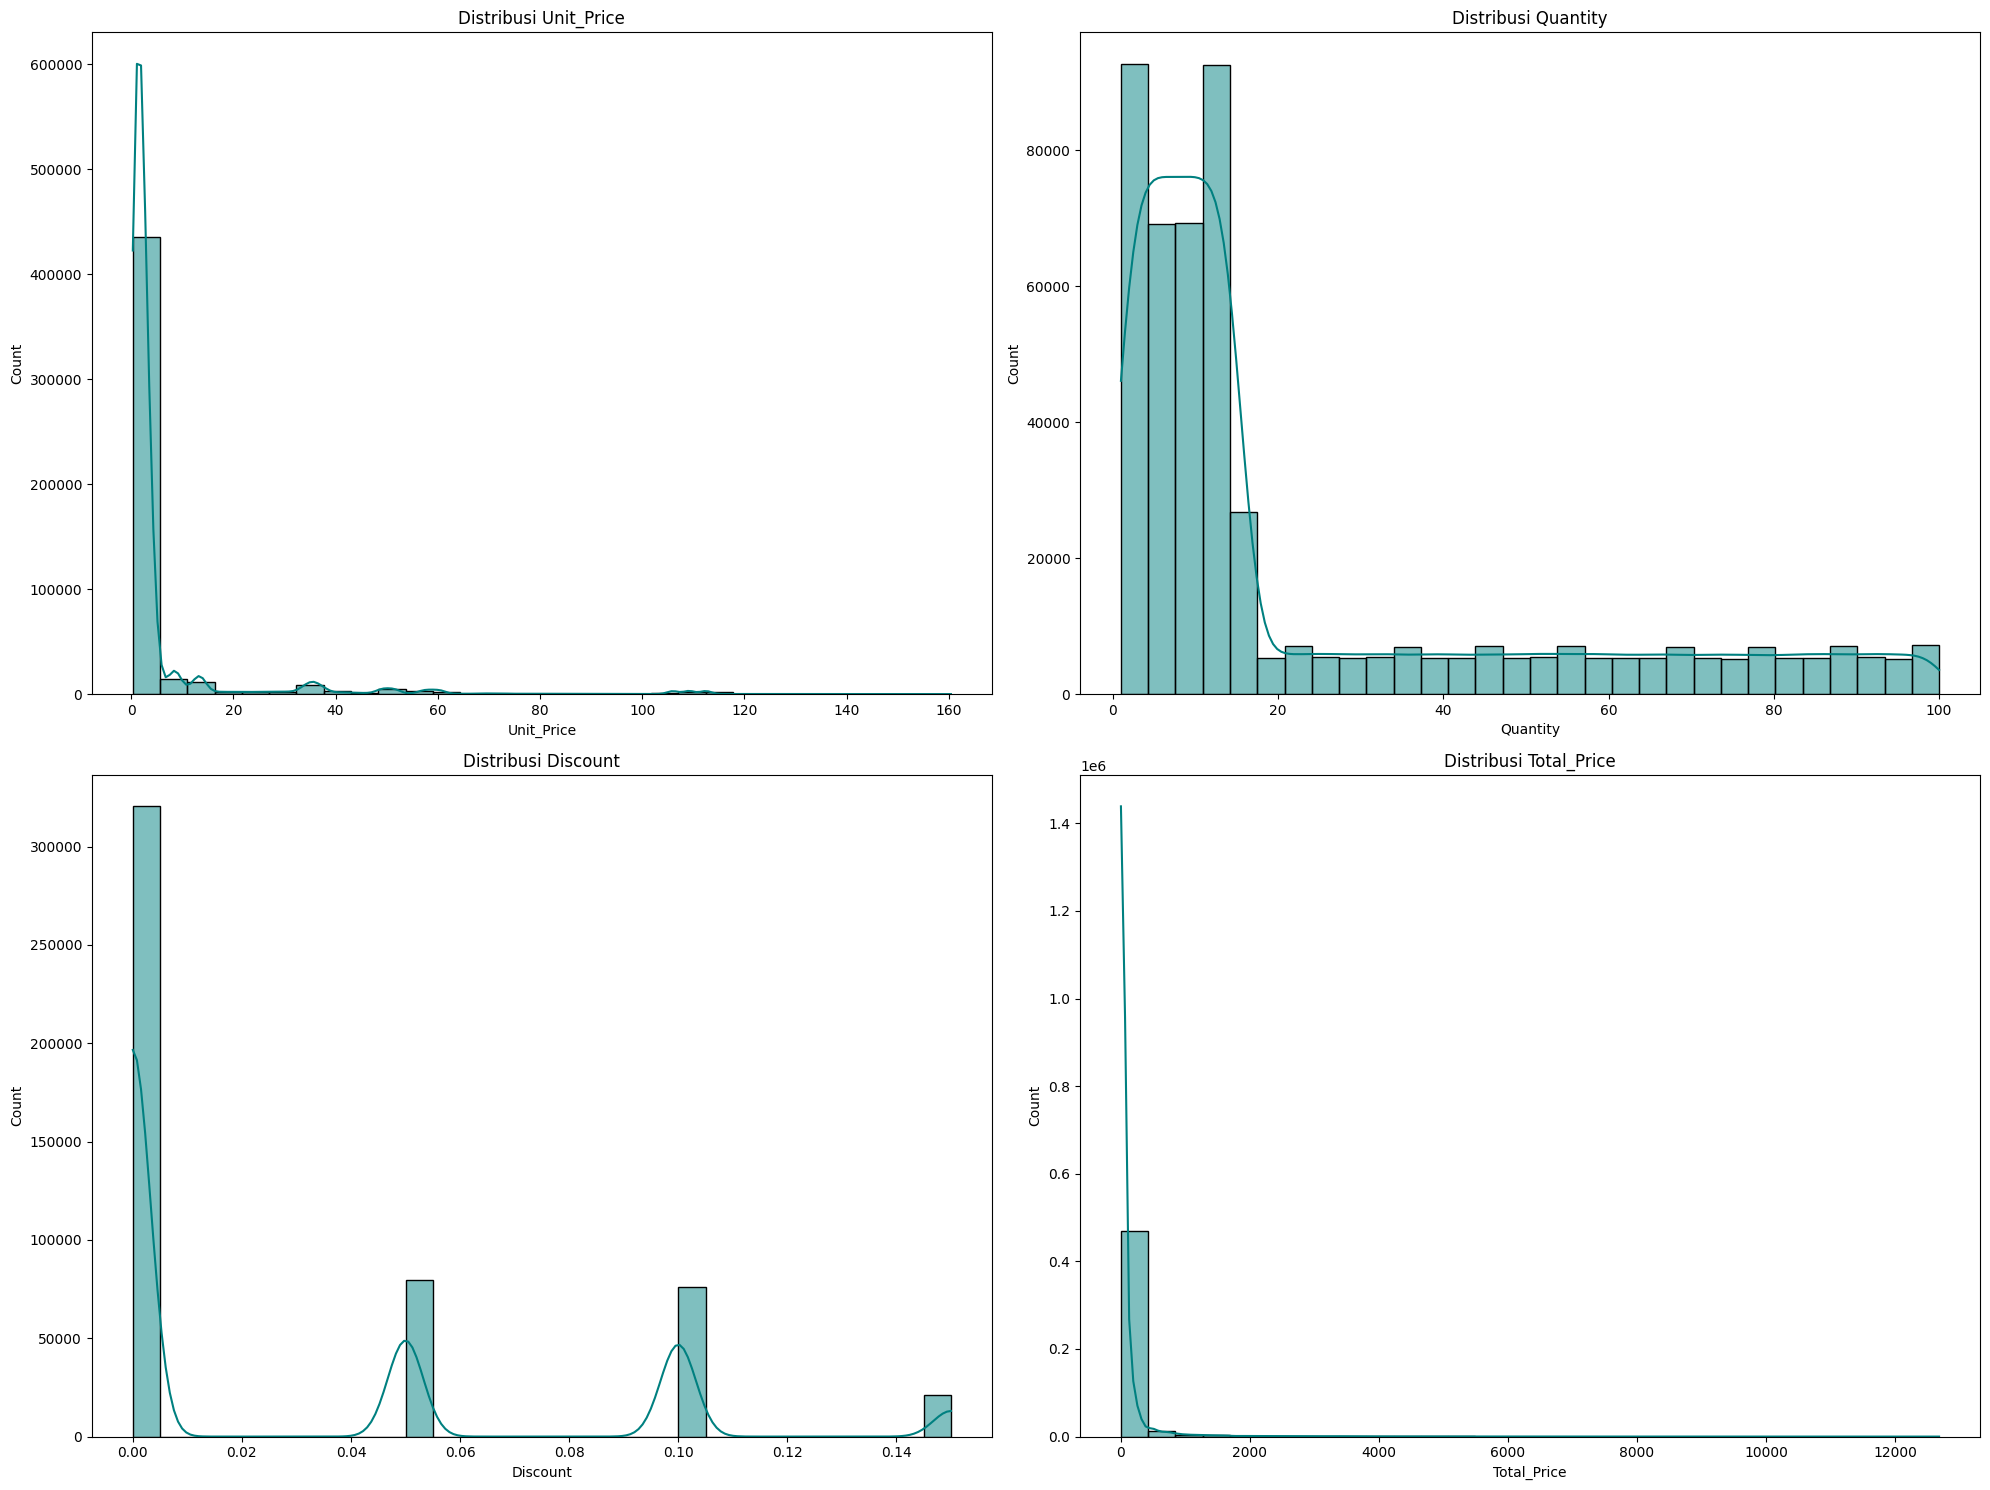

In [12]:
# Analisis Distribusi Variabel Numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(['Unit_Price', 'Quantity', 'Discount', 'Total_Price']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

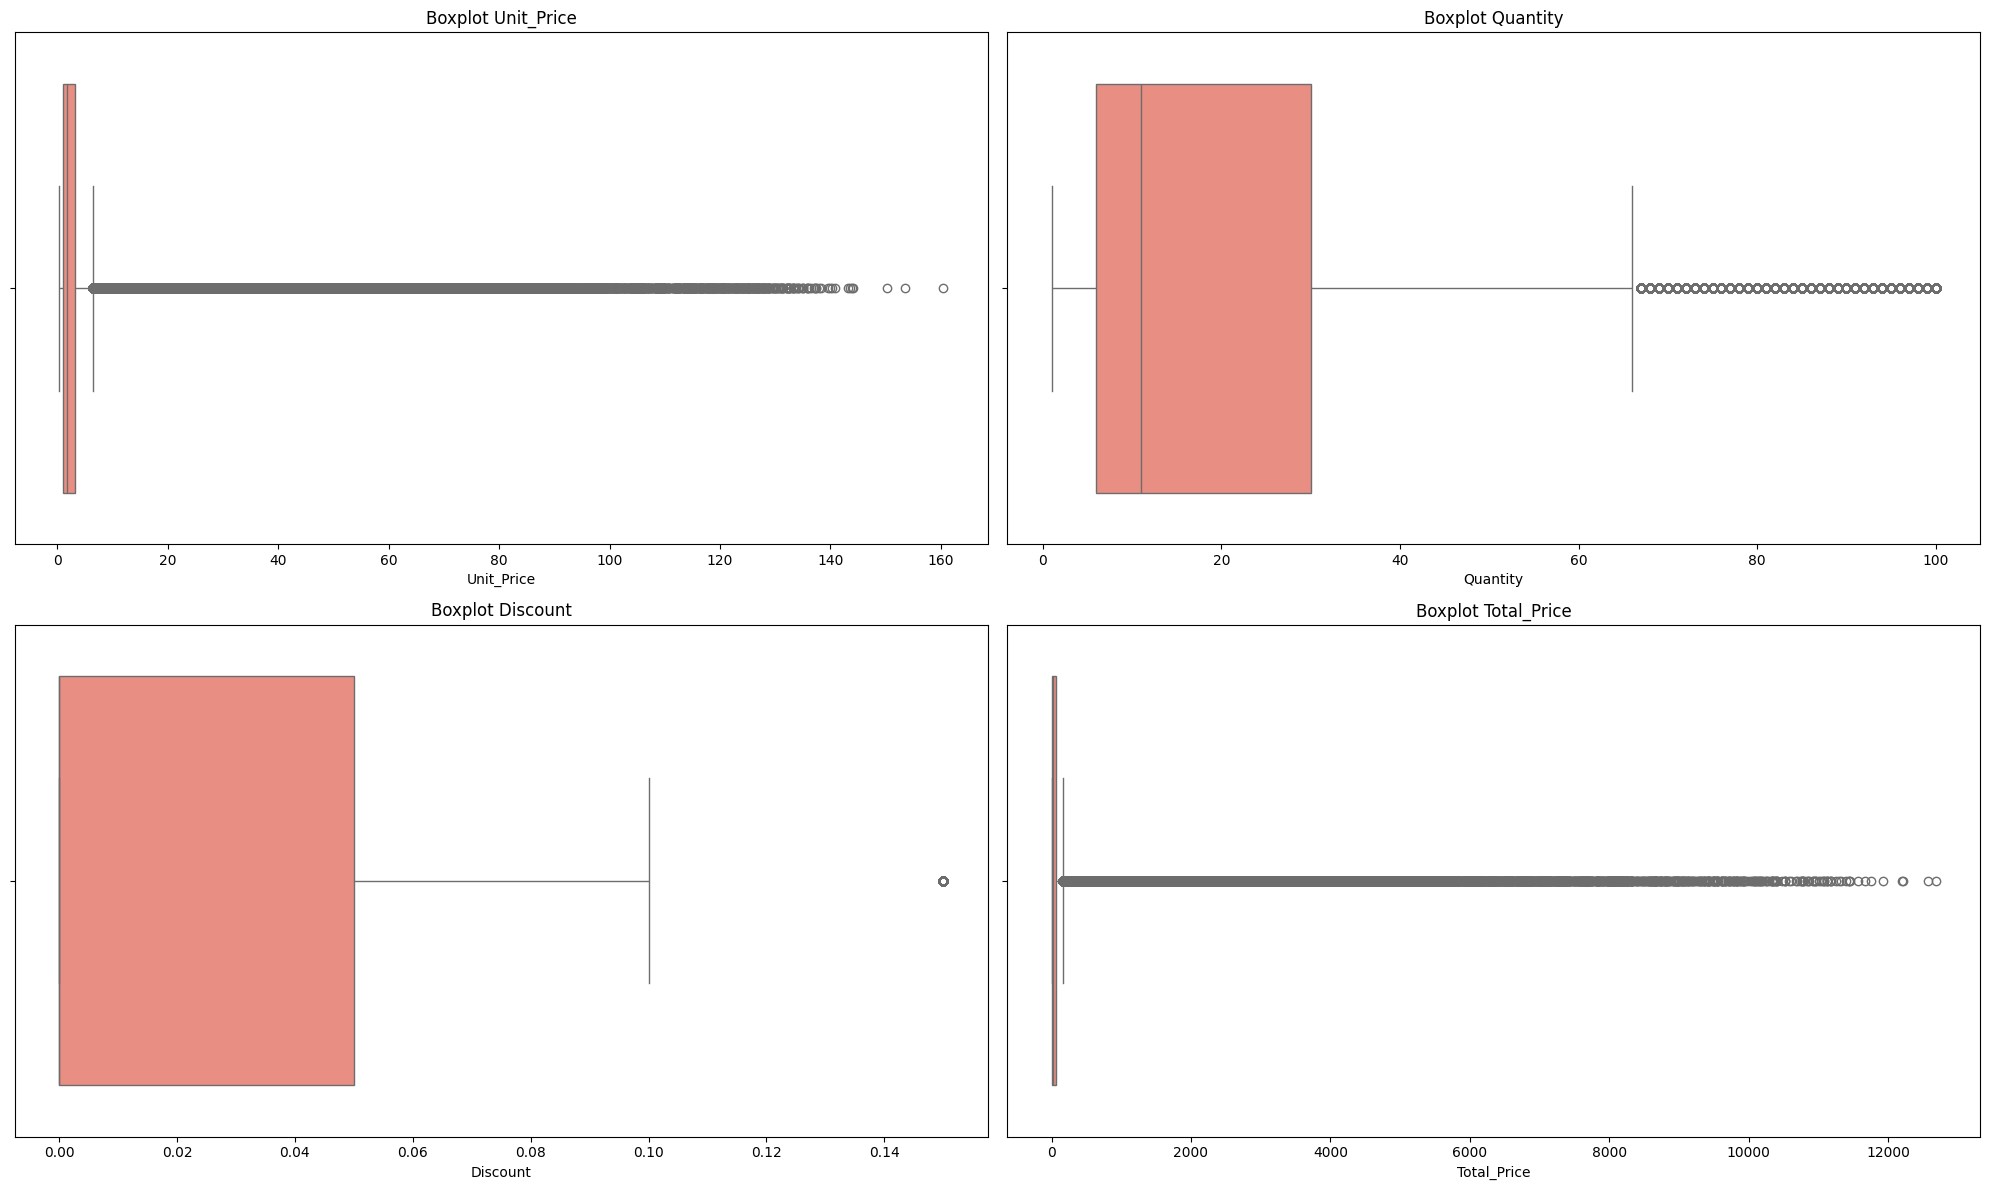

In [13]:
# Boxplot Variabel Numerik
plt.figure(figsize=(20, 12))
for i, col in enumerate(['Unit_Price', 'Quantity', 'Discount', 'Total_Price']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x=col, color='salmon')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


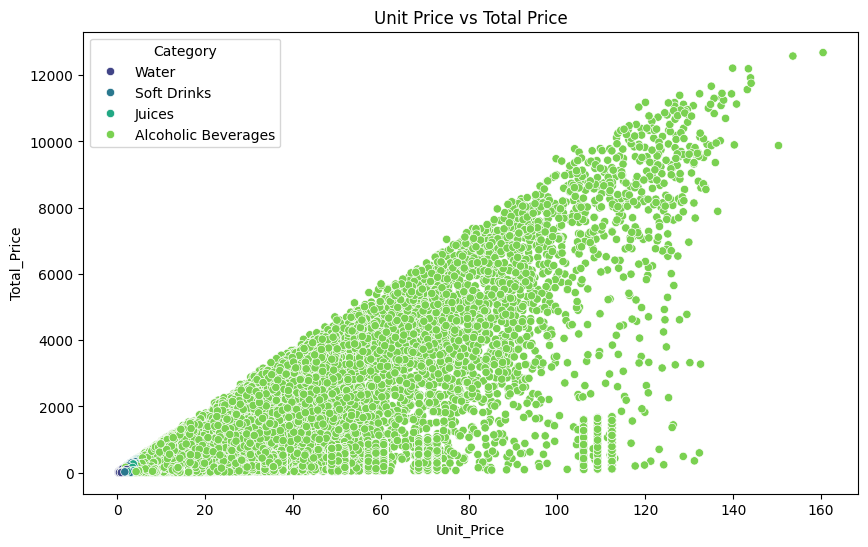

In [14]:
# Scatter Plot Unit Price vs Total Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Unit_Price', y='Total_Price', hue='Category', palette='viridis')
plt.title('Unit Price vs Total Price')
plt.show()

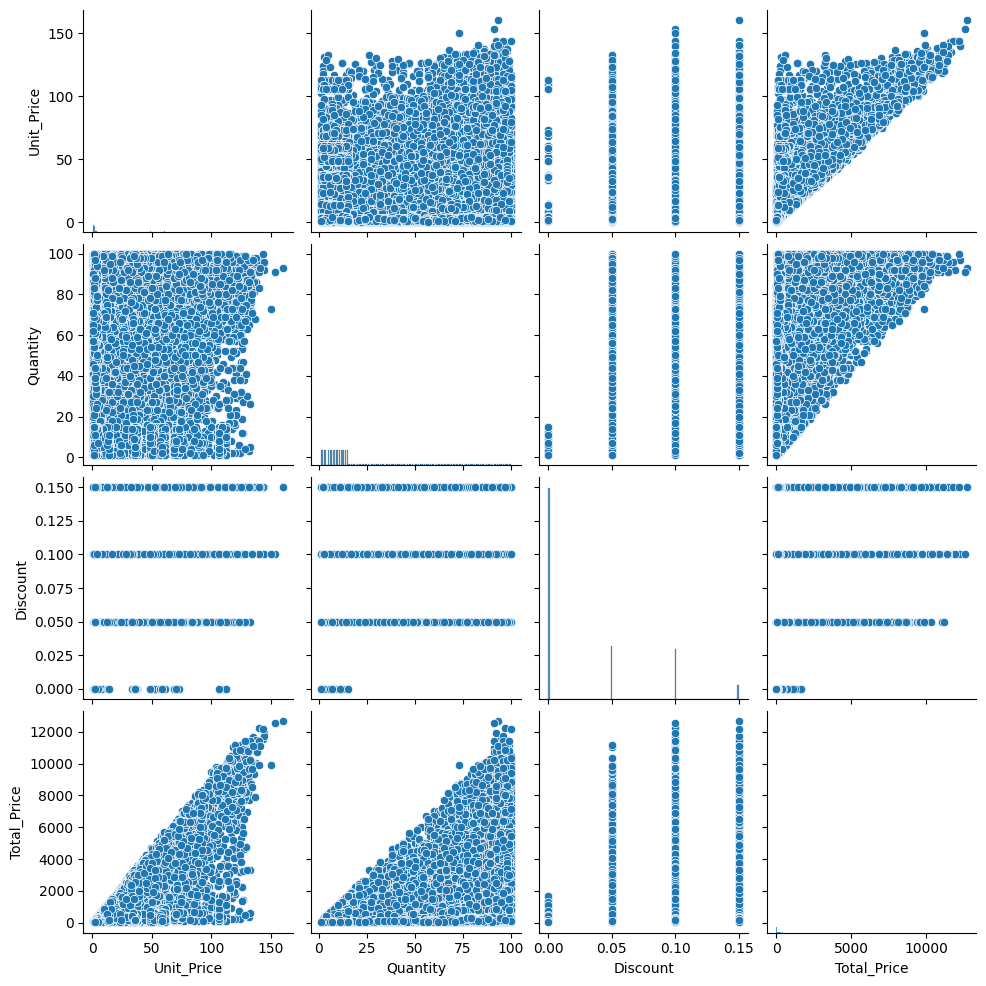

In [15]:
# Scatter Plot untuk hubungan antar variabel (semuanya)
sns.pairplot(data.select_dtypes(include=['number']))
plt.show()

<ipython-input-16-850a3cee468d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Customer_Type', palette='Set2')


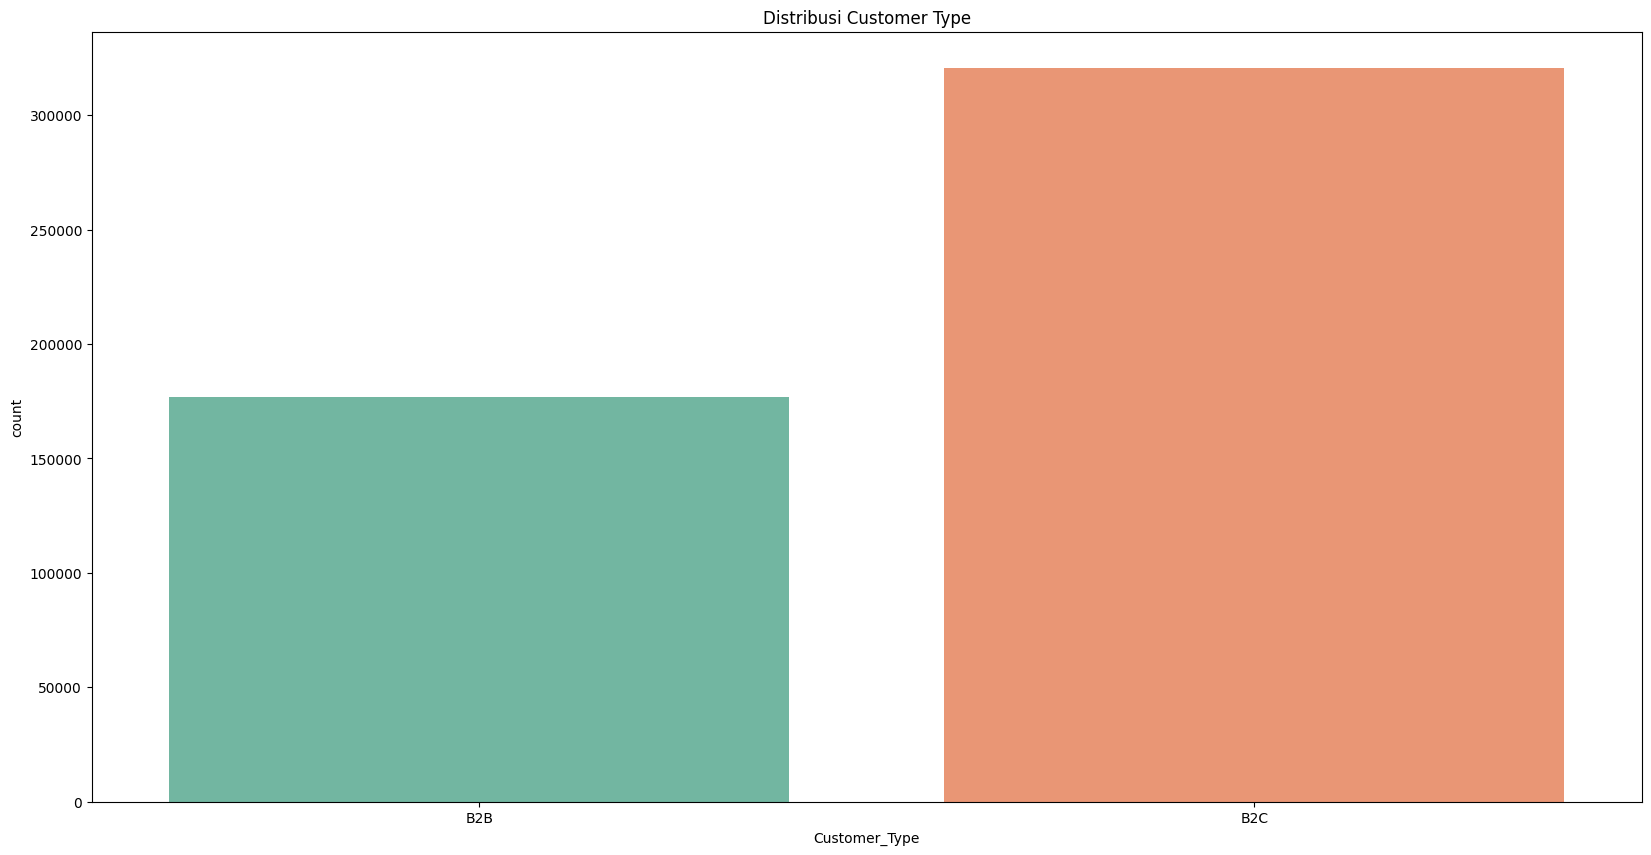

In [16]:
# 4. Visualisasi Data
# Visualisasi Variabel Kategorikal
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Customer_Type', palette='Set2')
plt.title('Distribusi Customer Type')
plt.show()

<ipython-input-17-f78e644b0138>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', palette='Set3')


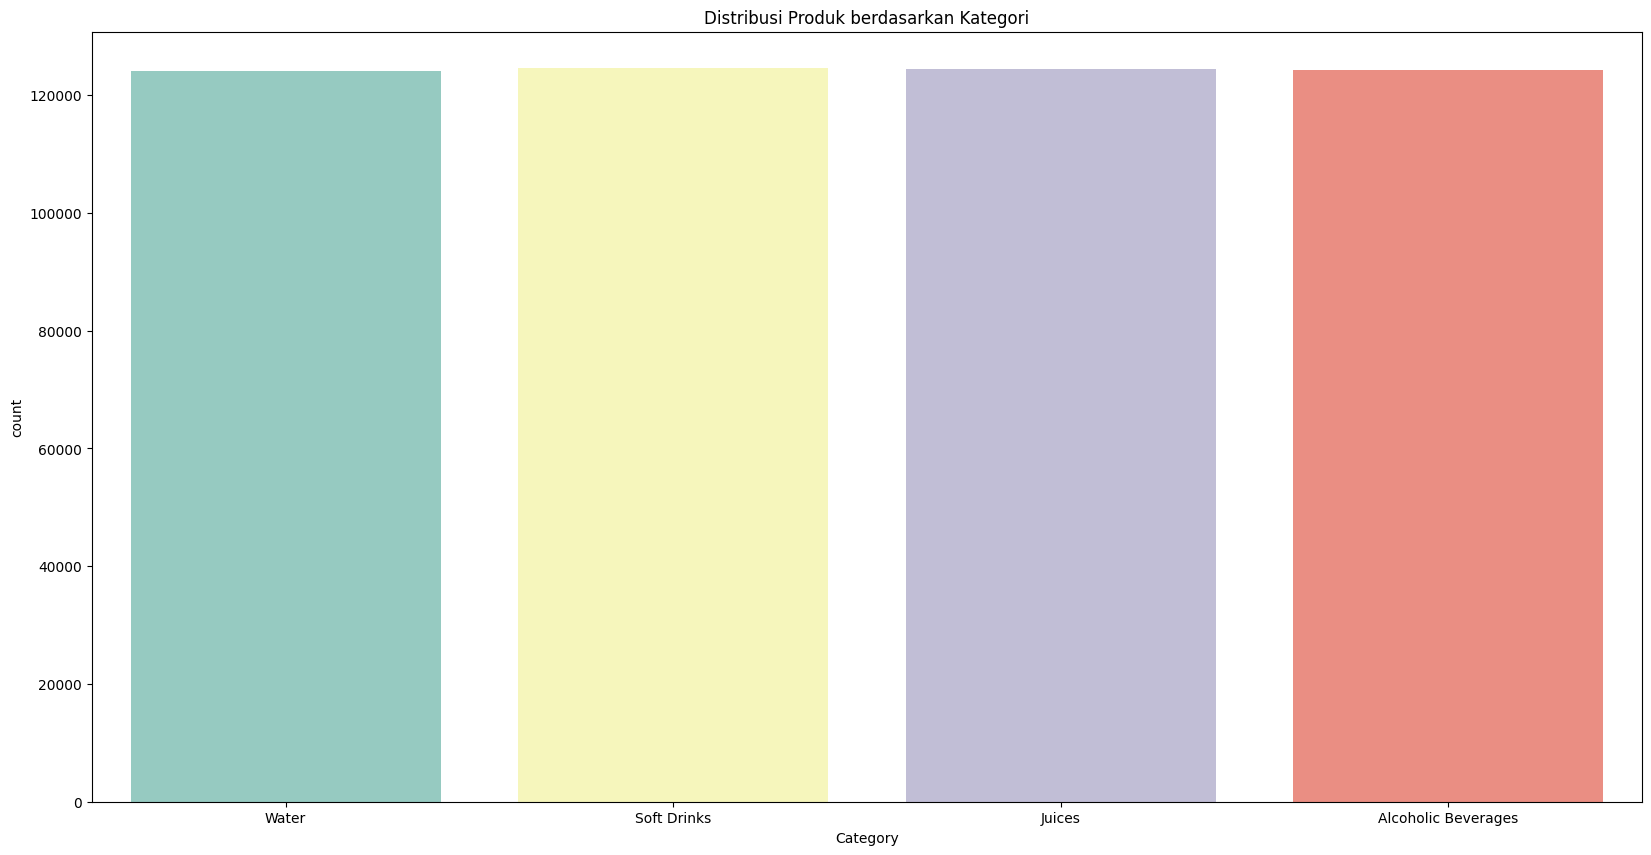

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Category', palette='Set3')
plt.title('Distribusi Produk berdasarkan Kategori')
plt.show()

<ipython-input-18-0b1ec7a1b11e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Region', palette='Set1')


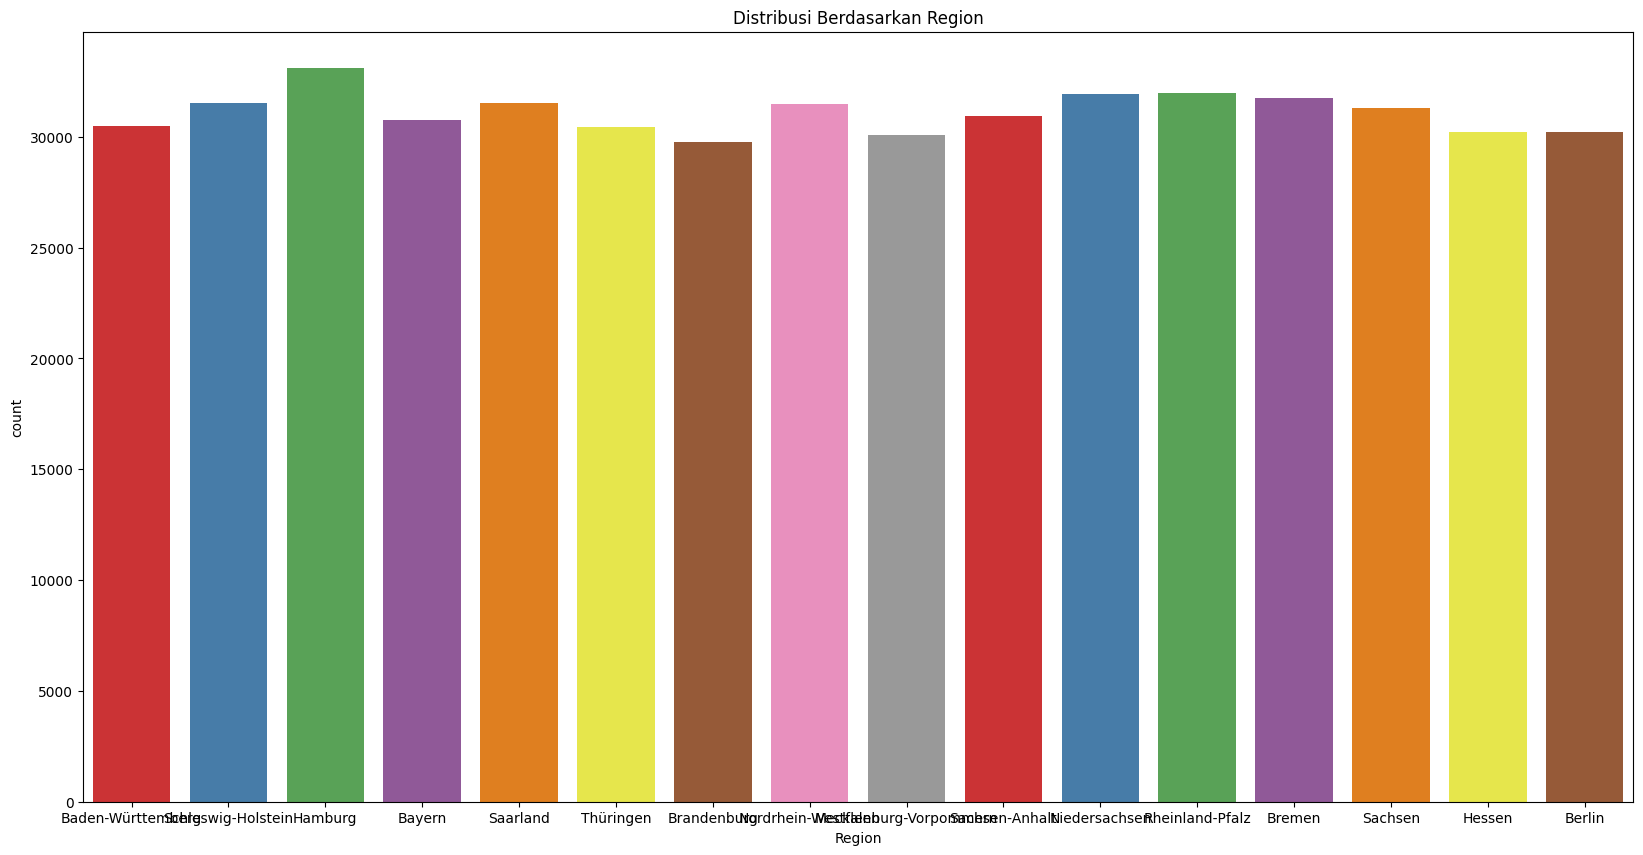

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Region', palette='Set1')
plt.title('Distribusi Berdasarkan Region')
plt.show()

In [19]:
# Pairplot untuk Hubungan Antar Variabel Numerik
 # Pilih hanya fitur numerik untuk pairplot
numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

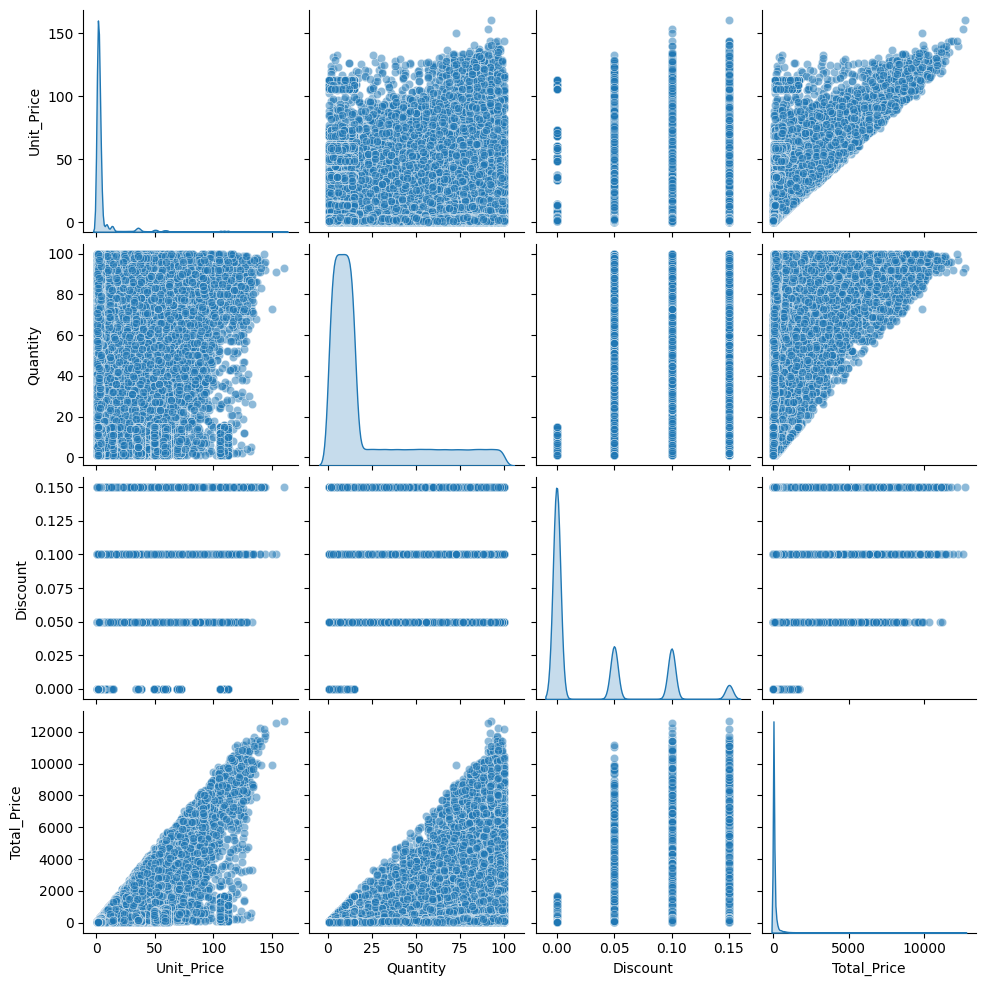

In [20]:
# Pairplot
sns.pairplot(data[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [21]:
print("\nJumlah Missing Values :\n", data.isnull().sum())


Jumlah Missing Values :
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


Tidak ada missing values, karena sebelumnya sudah dilakukan penanganan missing values

In [22]:
# Menghapus Data Duplikat
before_dedup = data.shape[0]
data.drop_duplicates(inplace=True)
after_dedup = data.shape[0]
print(f"\nJumlah data duplikat yang dihapus: {before_dedup - after_dedup}")


Jumlah data duplikat yang dihapus: 0


In [84]:
# Memilih hanya kolom numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_cols]

In [86]:
# Sampling Data (20% dari data mentah)
data_sampled = numerical_data.sample(frac=0.2, random_state=42)

In [87]:
# Standardisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [88]:
# Mengonversi hasilnya kembali ke DataFrame agar lebih mudah dilihat
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
print(scaled_df.head())

   Customer_Type  Category  Unit_Price  Quantity    Region
0      -1.517654  1.239098   -0.166450  1.513528 -1.641670
1      -1.517654  1.239098   -0.185473  3.147925 -1.641670
2      -1.517654  0.314539   -0.259661  2.396986 -1.641670
3      -1.517654  1.239098   -0.316730  0.718416 -1.641670
4       0.658912 -1.534581    1.246937 -0.739289  1.408644


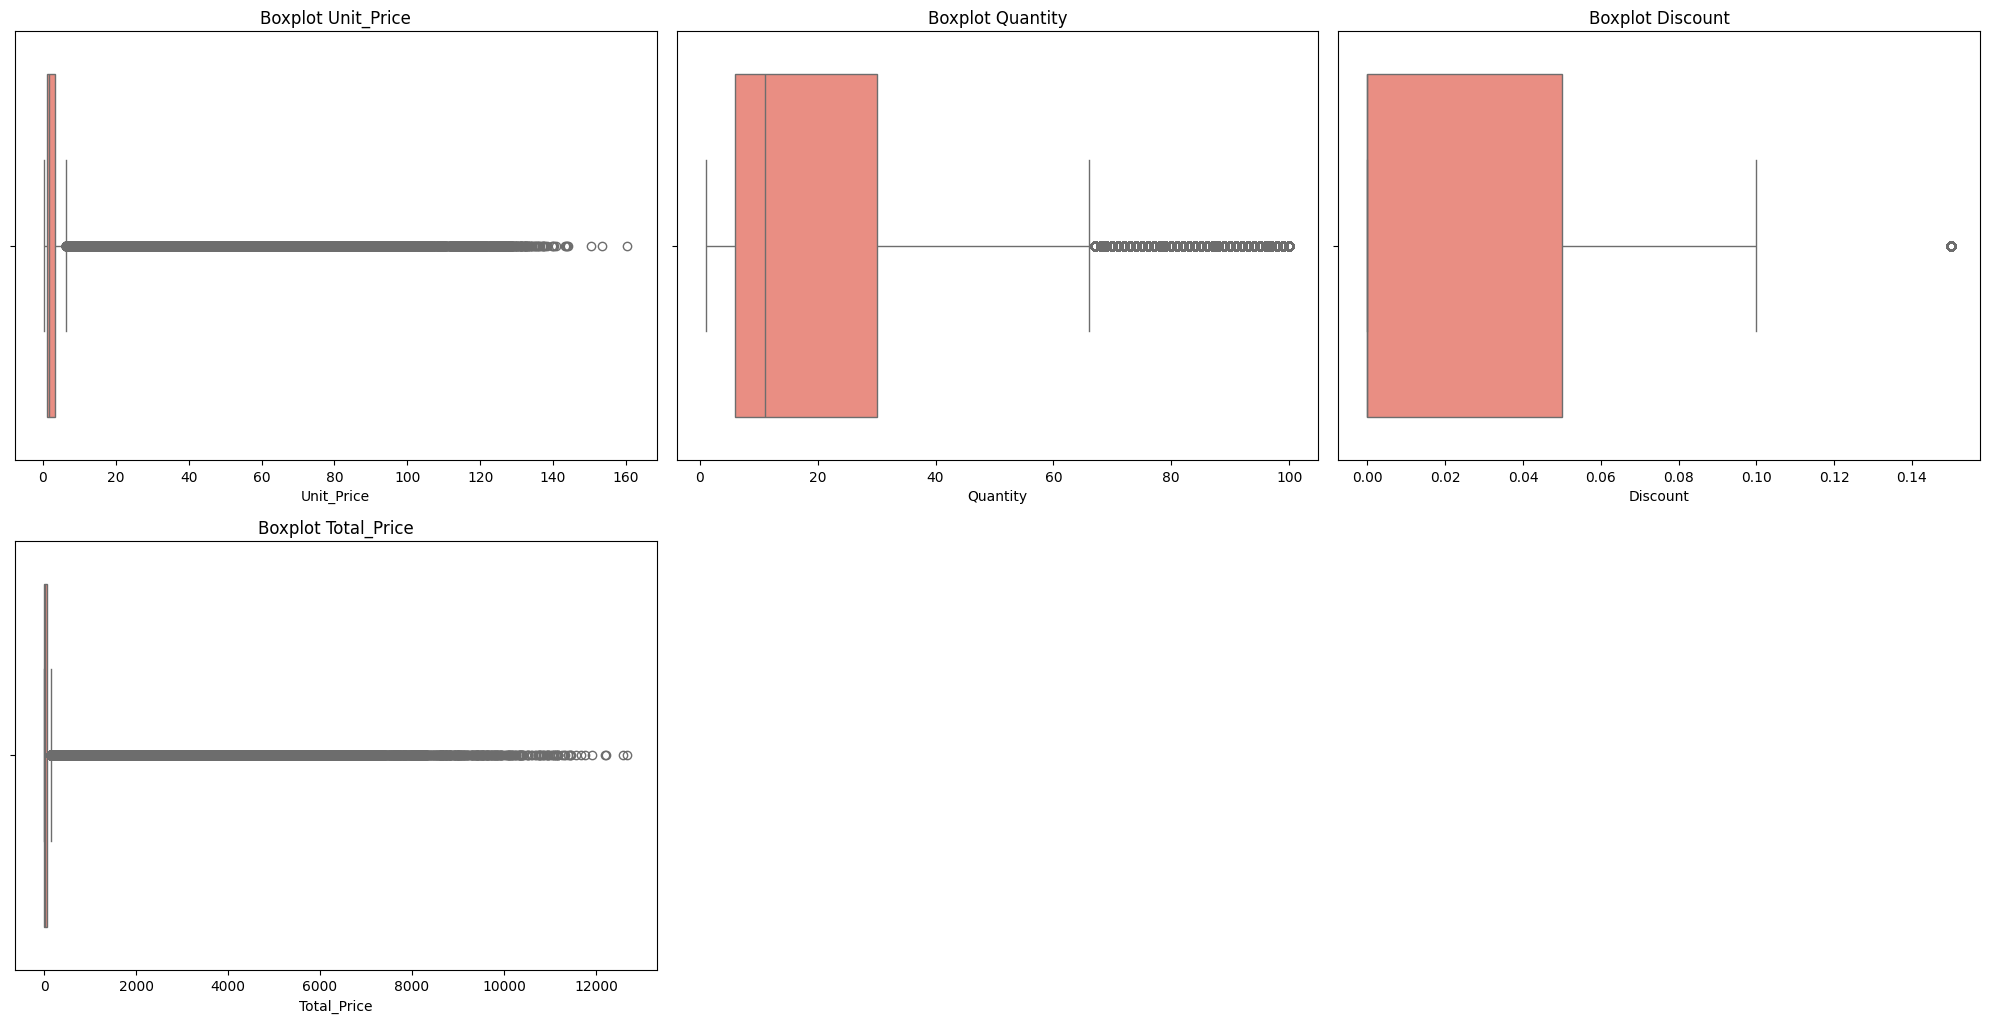

In [25]:
# Deteksi dan Penanganan Outlier
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x=col, color='salmon')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [26]:
# Menghapus outlier menggunakan IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [27]:
# Menghapus outlier untuk semua kolom numerik
for col in numerical_cols:
    dataset = remove_outliers(data, col)

print("\nData setelah menghapus outlier:")
print(dataset.shape)


Data setelah menghapus outlier:
(432732, 11)


In [28]:
from sklearn.preprocessing import LabelEncoder
# Encoding Data Kategorikal
categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

print("\nData setelah encoding kategorikal:")
print(dataset.head())

<ipython-input-28-345b0655f408>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])
<ipython-input-28-345b0655f408>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])
<ipython-input-28-345b0655f408>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc


Data setelah encoding kategorikal:
   Order_ID  Customer_ID  Customer_Type  Product  Category  Unit_Price  \
0         0          553              0       42         3        1.66   
1         0          553              0        9         3        1.56   
2         0          553              0       38         2        1.17   
4         0          553              0       12         3        0.87   
5     74232         2054              1       35         0        9.09   

   Quantity  Discount  Total_Price  Region  Order_Date  
0      53.0      0.10        79.18       0         964  
1      90.0      0.10       126.36       0         964  
2      73.0      0.05        81.14       0         964  
4      35.0      0.10        27.40       0         964  
5       2.0      0.00        18.18      14         804  


<ipython-input-28-345b0655f408>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])
<ipython-input-28-345b0655f408>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])


In [29]:
# Binning (Pengelompokan Data)
# Contoh: Mengelompokkan 'Unit_Price' menjadi 3 kategori
bin_labels = ['Murah', 'Sedang', 'Mahal']
dataset['Unit_Price_Binned'] = pd.qcut(dataset['Unit_Price'], q=3, labels=bin_labels)

print("\nData setelah binning:")
print(dataset[['Unit_Price', 'Unit_Price_Binned']].head())


Data setelah binning:
   Unit_Price Unit_Price_Binned
0        1.66            Sedang
1        1.56            Sedang
2        1.17            Sedang
4        0.87             Murah
5        9.09             Mahal


<ipython-input-29-82e4b05f70bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Unit_Price_Binned'] = pd.qcut(dataset['Unit_Price'], q=3, labels=bin_labels)


<ipython-input-30-2dfd4affdbee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Unit_Price_Binned', palette='Set2')


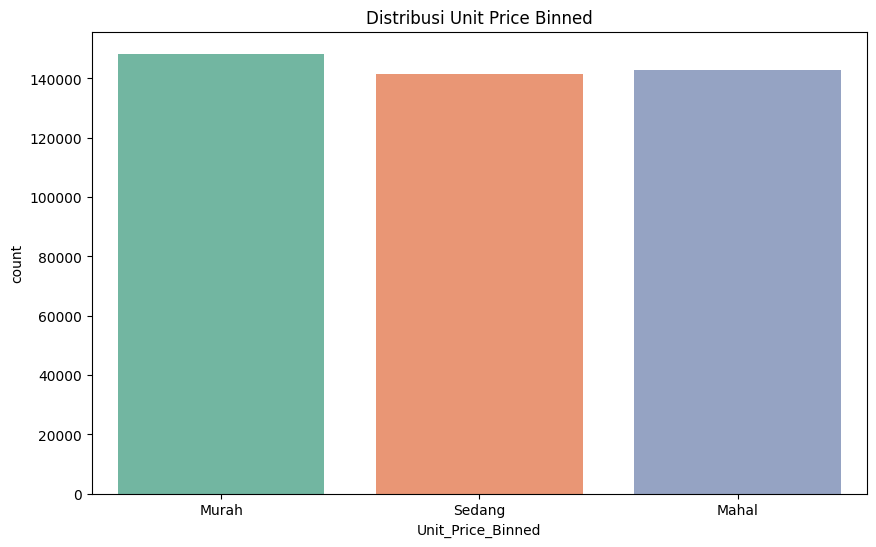

In [30]:
# Visualisasi Binning
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Unit_Price_Binned', palette='Set2')
plt.title('Distribusi Unit Price Binned')
plt.show()

In [89]:
# Cek hasil preprocessing
print(data.head())
print(data.info())

   Customer_Type  Category  Unit_Price  Quantity  Region
0              0         3        1.66      53.0       0
1              0         3        1.56      90.0       0
2              0         2        1.17      73.0       0
4              0         3        0.87      35.0       0
5              1         0        9.09       2.0      14
<class 'pandas.core.frame.DataFrame'>
Index: 432732 entries, 0 to 497476
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Customer_Type  432732 non-null  int64  
 1   Category       432732 non-null  int64  
 2   Unit_Price     432732 non-null  float64
 3   Quantity       432732 non-null  float64
 4   Region         432732 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 19.8 MB
None


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [90]:
# Memilih 5 Fitur dengan Campuran Numerikal dan Kategorikal
selected_features = ['Customer_Type', 'Category', 'Unit_Price', 'Quantity', 'Region']
data = dataset[selected_features]

In [91]:
# Cek apakah ada NaN dalam dataset
print(data.isnull().sum())

Customer_Type    0
Category         0
Unit_Price       0
Quantity         0
Region           0
dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [35]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [36]:
# Sampling Data (mengambil 20% data secara acak)
data_sampled = data.sample(frac=0.2, random_state=42)

Sampling Data: Mengambil 20% data untuk mempercepat proses.

In [92]:
# Mengurangi dimensi dengan PCA agar lebih cepat
pca = PCA(n_components=5)  # Kurangi jumlah komponen sesuai kebutuhan
data_reduced = pca.fit_transform(data_sampled)

PCA (Principal Component Analysis): Mengurangi dimensi data untuk mengurangi beban komputasi.

In [38]:
# Elbow Method dan Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    # Menggunakan MiniBatchKMeans untuk mempercepat proses
    kmeans = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=512,    # Mengurangi ukuran batch agar lebih cepat
        max_iter=50,       # Mengurangi iterasi
        init='k-means++'   # Inisialisasi lebih cepat
    )
    kmeans.fit(data_reduced)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(data_reduced, kmeans.labels_)
    silhouette_scores.append(score)

MiniBatchKMeans:
- Mengurangi ukuran batch menjadi 512.
- Mengurangi jumlah iterasi menjadi 50.

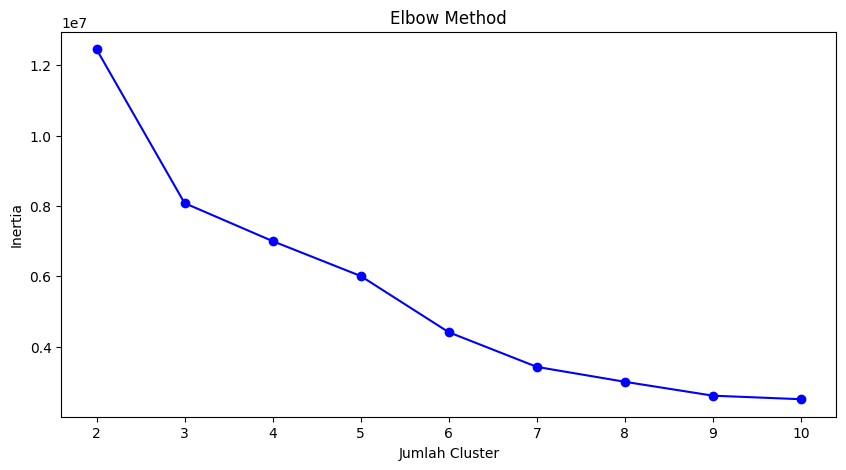

In [39]:
# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

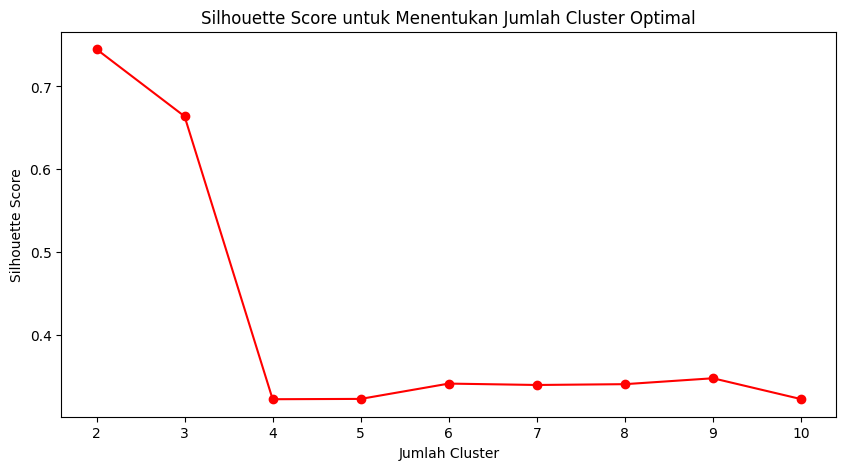

In [40]:
# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [93]:
# Menampilkan Nilai Silhouette Score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Cluster optimal berdasarkan Silhouette Score: {optimal_k} dengan nilai: {max(silhouette_scores)}")

Cluster optimal berdasarkan Silhouette Score: 2 dengan nilai: 0.7449627758999494


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [94]:
# Melakukan clustering ulang dengan jumlah cluster optimal
kmeans = MiniBatchKMeans(
    n_clusters=optimal_k,
    random_state=42,
    batch_size=512,
    max_iter=50,
    init='k-means++'
)
kmeans.fit(data_reduced)

MiniBatchKMeans(batch_size=512, max_iter=50, n_clusters=2, random_state=42)

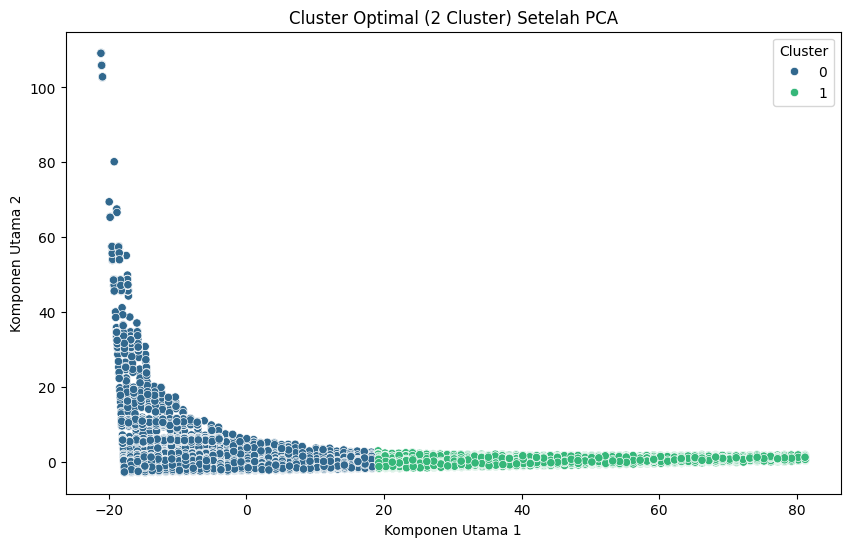

In [67]:
# Visualisasi Cluster Optimal Setelah PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title(f'Cluster Optimal ({optimal_k} Cluster) Setelah PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [95]:
# Menambahkan label cluster ke dalam DataFrame ter-sample yang sudah distandarisasi
sampled_scaled_df = pd.DataFrame(data_reduced, columns=[f'PC{i+1}' for i in range(data_reduced.shape[1])])
sampled_scaled_df['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [96]:
# Inverse Transform untuk Data yang Distandarisasi ke Skala Asli
inverse_data = scaler.inverse_transform(data_sampled)  # Inverse transform pada data terstandardisasi (bukan hasil PCA)

In [97]:
inverse_df = pd.DataFrame(inverse_data, columns=numerical_cols)
inverse_df['Cluster'] = sampled_scaled_df['Cluster'].values

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [98]:
# Analisis Karakteristik Tiap Cluster
print("Analisis Karakteristik Tiap Cluster:")
for cluster in range(optimal_k):
    cluster_data = inverse_df[inverse_df['Cluster'] == cluster]
    print(f"\nCluster {cluster + 1}:")
    print(cluster_data.describe())

Analisis Karakteristik Tiap Cluster:

Cluster 1:
       Customer_Type      Category    Unit_Price      Quantity        Region  \
count   72151.000000  72151.000000  72151.000000  72151.000000  72151.000000   
mean        1.080570      3.391630     16.945751    237.720978     42.215934   
std         0.170835      1.171154     29.931035    160.650914     21.102034   
min         0.697270      1.659796      4.269776     41.374583      7.534758   
25%         1.156709      2.741392      7.844452    131.927885     25.893525   
50%         1.156709      3.822988     11.156283    222.481187     44.252291   
75%         1.156709      4.904584     17.937653    313.034490     62.611058   
max         1.156709      4.904584    593.723227    856.354304     76.380133   

       Cluster  
count  72151.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 2:
       Customer_Type      Category    Unit_Price      Quantity   

Tulis hasil interpretasinya di sini.
# **Cluster 1: Pelanggan Biasa dengan Pembelian Stabil**
- Customer Type: Mayoritas pelanggan dalam cluster ini memiliki tipe pelanggan yang mirip (nilai mean 1.08), yang menunjukkan bahwa pelanggan ini cenderung berasal dari kelompok reguler atau biasa.
- Category: Rata-rata kategori produk berada di sekitar 3.39, dengan distribusi kategori yang cukup beragam dari 1.66 hingga 4.90.
- Unit Price: Harga satuan produk rata-rata adalah 16.94, dengan standar deviasi cukup besar (29.93), menunjukkan adanya variasi harga produk dalam cluster ini.
- Quantity: Jumlah produk yang dibeli rata-rata sebanyak 237.72 unit per transaksi, dengan standar deviasi sekitar 160.65, menunjukkan adanya variasi jumlah pembelian.
- Region: Wilayah distribusi pelanggan dalam cluster ini memiliki rata-rata nilai 42.21, menunjukkan bahwa mereka tersebar di berbagai wilayah dengan distribusi yang luas.

- **Analisis:**
Cluster 1 mencakup pelanggan reguler dengan pola pembelian yang stabil dan harga produk yang cukup bervariasi. Mereka berasal dari berbagai wilayah, tetapi pembelian dalam jumlah sedang hingga tinggi. Pelanggan di cluster ini mungkin merupakan konsumen umum dengan daya beli rata-rata dan cenderung membeli produk dengan harga menengah.

# **Cluster 2: Pelanggan Grosir atau Distributor**
- Customer Type: Semua pelanggan dalam cluster ini memiliki nilai tipe pelanggan yang sama (0.697), kemungkinan besar menunjukkan tipe grosir atau distributor.
- Category: Rata-rata kategori produk berada di 3.77, dengan rentang kategori yang tidak jauh berbeda dari Cluster 1.
- Unit Price: Harga satuan produk lebih rendah dibandingkan Cluster 1 dengan rata-rata 10.15 dan standar deviasi yang lebih kecil (3.61).
- Quantity: Jumlah produk yang dibeli sangat tinggi, rata-rata mencapai 1479.95 unit per transaksi, menunjukkan bahwa mereka membeli dalam jumlah besar.
- Region: Wilayah distribusi pelanggan dalam cluster ini memiliki rata-rata nilai 41.61, menunjukkan persebaran yang hampir sama dengan Cluster 1.

- **Analisis:**
Cluster 2 terdiri dari pelanggan grosir atau distributor dengan pembelian dalam jumlah besar namun dengan harga satuan lebih rendah. Hal ini sesuai dengan pola pembelian grosir yang umumnya membeli dalam volume besar dengan harga per unit yang lebih murah.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [100]:
# Mengeksport Data ke CSV
inverse_df.to_csv('Dataset_Inisiasi.csv', index=False)
print("\nData hasil clustering berhasil disimpan dalam file 'Dataset_Inisiasi.csv'")


Data hasil clustering berhasil disimpan dalam file 'Dataset_Inisiasi.csv'
